# SmoothL1Loss（也叫 Huber Loss）

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

$$
\operatorname{SmoothL} 1(x)= \begin{cases}0.5 \cdot \frac{x^2}{\beta}, & \text { if }|x|<\beta \\ |x|-0.5 \cdot \beta, & \text { otherwise }\end{cases}
$$

- 小误差 $\rightarrow$ 相当于 MSE
- 大误差 $\rightarrow$ 相当于 L1
- beta 控制分界点（在 PyTorch 中默认是 1）

In [2]:
pred = torch.tensor([2.5, 0.0, 2.0, 8.0])
target = torch.tensor([3.0, -0.5, 2.0, 7.0])

loss_fn = nn.SmoothL1Loss(beta=1.0)  # 可不写，默认beta=1.0
loss = loss_fn(pred, target)

print("Smooth L1 Loss:", loss.item())


Smooth L1 Loss: 0.1875


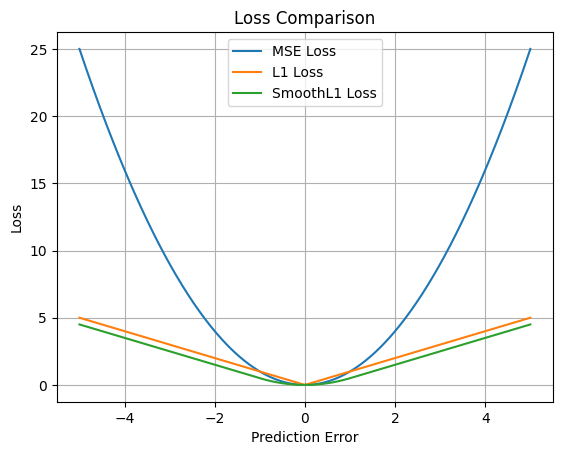

In [3]:
y_true = 0.0
y_pred_range = torch.linspace(-5, 5, 400)

l1 = torch.abs(y_pred_range - y_true)
mse = (y_pred_range - y_true) ** 2
smooth_l1 = torch.where(
        torch.abs(y_pred_range - y_true) < 1,
        0.5 * (y_pred_range - y_true) ** 2,
        torch.abs(y_pred_range - y_true) - 0.5
)

plt.plot(y_pred_range.numpy(), mse.numpy(), label='MSE Loss')
plt.plot(y_pred_range.numpy(), l1.numpy(), label='L1 Loss')
plt.plot(y_pred_range.numpy(), smooth_l1.numpy(), label='SmoothL1 Loss')
plt.title("Loss Comparison")
plt.xlabel("Prediction Error")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()
